<a href="https://colab.research.google.com/github/Exper626/Census-Income-ML/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
sns.set(color_codes=True)

# Step 01: Data Preprocessing

Load the data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


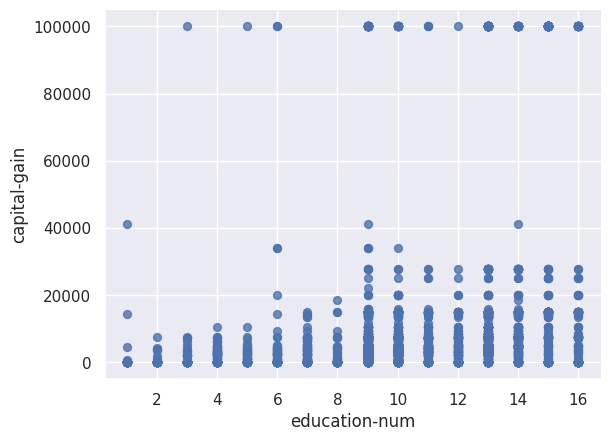

In [ ]:
# @title education-num vs capital-gain

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='education-num', y='capital-gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

missing values

In [ ]:
missing_values = X.isnull().sum()
print(missing_values)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64


In [ ]:
missingValues = y.isnull().sum()
print(missingValues)

income    0
dtype: int64


fix the missing values

In [ ]:
columns_to_fill = ['workclass', 'occupation', 'native-country']

for column in columns_to_fill:
    X[column].fillna('Unknown', inplace=True)

<ipython-input-7-446ff7d12b6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna('Unknown', inplace=True)


check if it's ok

now that we confirmed missing values is not present, we have to check the values

In [ ]:
income_unique = y['income'].unique()
print(income_unique)

['<=50K' '>50K' '<=50K.' '>50K.']


In [ ]:
y_fix = y.copy()
y_fix['income'].value_counts()

y_fix.loc[:, 'income'].replace('<=50K.','<=50K', regex=True, inplace=True)
y_fix.loc[:, 'income'].replace('>50K.','>50K', regex=True, inplace=True)

In [ ]:
y_fix['income'].value_counts()

<=50K    37128
>50K     11685
Name: income, dtype: int64

In [ ]:
for column in X.columns:
    unique_values = X[column].unique()
    print(f"'{column}': {unique_values} \n")

'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 

'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' 'Unknown'] 

'fnlwgt': [ 77516  83311 215646 ... 173449  89686 350977] 

'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

'occupation': ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machi

In [ ]:
X.replace("?", "Unknown", inplace=True)
print("Done replacing")

Done replacing


<ipython-input-10-2ad85036db7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("?", "Unknown", inplace=True)


In [ ]:
import pandas as pd

# Concatenating X and y into a single DataFrame for duplicate detection
data_with_income = pd.concat([X, y], axis=1)

# Concatenate all columns into a single column
merged_column = data_with_income.apply(lambda row: ','.join(row.values.astype(str)), axis=1)

# Check for duplicates in the merged column
duplicates = merged_column[merged_column.duplicated()]

# Print duplicate rows if any
if len(duplicates) > 0:
    print("Duplicate rows found:")
    print(duplicates)

    # Count the number of duplicates
    num_duplicates = len(duplicates)
    print(f"Total duplicate rows found: {num_duplicates}")

    # Drop duplicate rows from X and y
    duplicate_indices = merged_column[merged_column.duplicated()].index
    X = X.drop(duplicate_indices)
    y = y.drop(duplicate_indices)
    print("Duplicate rows dropped from X and y.")
else:
    print("No duplicate rows found.")


Duplicate rows found:
4881     25,Private,308144,Bachelors,13,Never-married,C...
5104     90,Private,52386,Some-college,10,Never-married...
9171     21,Private,250051,Some-college,10,Never-marrie...
11631    20,Private,107658,Some-college,10,Never-marrie...
13084    25,Private,195994,1st-4th,2,Never-married,Priv...
15059    21,Private,243368,Preschool,1,Never-married,Fa...
17040    46,Private,173243,HS-grad,9,Married-civ-spouse...
18555    30,Private,144593,HS-grad,9,Never-married,Othe...
18698    19,Private,97261,HS-grad,9,Never-married,Farmi...
21318    19,Private,138153,Some-college,10,Never-marrie...
21490    19,Private,146679,Some-college,10,Never-marrie...
21875    49,Private,31267,7th-8th,4,Married-civ-spouse,...
22300    25,Private,195994,1st-4th,2,Never-married,Priv...
22367    44,Private,367749,Bachelors,13,Never-married,P...
22494    49,Self-emp-not-inc,43479,Some-college,10,Marr...
25872    23,Private,240137,5th-6th,3,Never-married,Hand...
26313    28,Private,274679,Masters

In [ ]:
# Concatenate all columns into a single column
merged_column = X.apply(lambda row: ','.join(row.values.astype(str)), axis=1)

# Check for duplicates in the merged column
duplicates = merged_column[merged_column.duplicated()]

# Print duplicate rows if any
if len(duplicates) > 0:
    print("Duplicate rows found:")
    print(duplicates)

    # Count the number of duplicates
    num_duplicates = len(duplicates)
    print(f"Total duplicate rows found: {num_duplicates}")

    # Drop duplicate rows from X
    duplicate_indices = merged_column[merged_column.duplicated()].index
    X = X.drop(duplicate_indices)
    print("Duplicate rows dropped from X.")
else:
    print("No duplicate rows found.")


Duplicate rows found:
4881     25,Private,308144,Bachelors,13,Never-married,C...
5104     90,Private,52386,Some-college,10,Never-married...
9171     21,Private,250051,Some-college,10,Never-marrie...
11631    20,Private,107658,Some-college,10,Never-marrie...
13084    25,Private,195994,1st-4th,2,Never-married,Priv...
15059    21,Private,243368,Preschool,1,Never-married,Fa...
17040    46,Private,173243,HS-grad,9,Married-civ-spouse...
18555    30,Private,144593,HS-grad,9,Never-married,Othe...
18698    19,Private,97261,HS-grad,9,Never-married,Farmi...
21318    19,Private,138153,Some-college,10,Never-marrie...
21490    19,Private,146679,Some-college,10,Never-marrie...
21875    49,Private,31267,7th-8th,4,Married-civ-spouse,...
22300    25,Private,195994,1st-4th,2,Never-married,Priv...
22367    44,Private,367749,Bachelors,13,Never-married,P...
22494    49,Self-emp-not-inc,43479,Some-college,10,Marr...
22761    39,Private,138192,Bachelors,13,Married-civ-spo...
25872    23,Private,240137,5th-6th

In [ ]:
X.drop(columns=['fnlwgt'], inplace=True)

In [ ]:
X.drop(columns=['education'], inplace=True)

In [ ]:
# Selecting only the categorical columns for one-hot encoding
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# One-hot encoding categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Displaying the encoded data
print(X_encoded.head())


   age  education-num     sex  capital-gain  capital-loss  hours-per-week  \
0   39             13    Male          2174             0              40   
1   50             13    Male             0             0              13   
2   38              9    Male             0             0              40   
3   53              7    Male             0             0              40   
4   28             13  Female             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                      0                    0                       0   
1                      0                    0                       0   
2                      0                    0                       0   
3                      0                    0                       0   
4                      0                    0                       0   

   workclass_Private  ...  native-country_Puerto-Rico  \
0                  0  ...                

In [ ]:
"""# Importing necessary library
from sklearn.preprocessing import OneHotEncoder

# Creating a list of categorical columns
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# One-hot encoding categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Displaying the encoded data
print(X_encoded.head())"""


   age  education-num     sex  capital-gain  capital-loss  hours-per-week  \
0   39             13    Male          2174             0              40   
1   50             13    Male             0             0              13   
2   38              9    Male             0             0              40   
3   53              7    Male             0             0              40   
4   28             13  Female             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                      0                    0                       0   
1                      0                    0                       0   
2                      0                    0                       0   
3                      0                    0                       0   
4                      0                    0                       0   

   workclass_Private  ...  native-country_Puerto-Rico  \
0                  0  ...                

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the integer variables
X_scaled = X.copy()  # Make a copy of the original DataFrame
X_scaled[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X_scaled[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

# Display the scaled data
print(X_scaled.head())


        age         workclass  education-num      marital-status  \
0  0.025724         State-gov       1.136595       Never-married   
1  0.828125  Self-emp-not-inc       1.136595  Married-civ-spouse   
2 -0.047221           Private      -0.419685            Divorced   
3  1.046961           Private      -1.197826  Married-civ-spouse   
4 -0.776676           Private       1.136595  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male      0.146804   
1    Exec-managerial        Husband  White    Male     -0.144847   
2  Handlers-cleaners  Not-in-family  White    Male     -0.144847   
3  Handlers-cleaners        Husband  Black    Male     -0.144847   
4     Prof-specialty           Wife  Black  Female     -0.144847   

   capital-loss  hours-per-week native-country  
0     -0.217195       -0.034304  United-States  
1     -0.217195       -2.213335  United-States  
2     -0.217195       -0.034304  Un

In [ ]:
print("Shape of X_encoded:", X_encoded.shape)
print("Shape of y:", y.shape)


Shape of X_encoded: (48813, 90)
Shape of y: (48813, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)


Training set - Features: (39050, 90) Labels: (39050, 1)
Testing set - Features: (9763, 90) Labels: (9763, 1)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = nb_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: could not convert string to float: 'Male'